In [1]:
from tools import *
from models import *
import pandas as pd

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# 合并训练集与测试集
train["DatasetType"] = "train"
test["DatasetType"] = "test"
combined = pd.concat([train, test], axis=0).reset_index(drop=True)

# 特征类型
num_columns = ['Compartments', 'Weight Capacity (kg)', 'Price']
cat_columns = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
feature_columns = ['Price']

In [2]:
train['Brand'].value_counts()

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64

In [3]:
nike = train[train['Brand'] == 'Nike']
data_overview(nike)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,DatasetType
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,train
5,5,Nike,Canvas,Medium,10.0,No,Yes,NaN,Black,7.241812,20.01553,train
6,6,Nike,NaN,Large,3.0,No,No,Backpack,Green,6.828123,84.80500,train
10,10,Nike,Polyester,Large,1.0,Yes,No,Backpack,NaN,27.806951,68.31047,train
11,11,Nike,Polyester,NaN,10.0,No,No,NaN,Gray,13.697554,23.25963,train


,count,mean,std,min,25%,50%,75%,max
id,57336.0,150030.885656,86573.572440,3.0,75004.750000,149880.500000,224871.000000,299993.0
Compartments,57336.0,5.459955,2.888715,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),57319.0,18.024887,6.920131,5.0,12.180852,18.039439,23.955368,30.0
Price,57336.0,81.319209,39.129019,15.0,47.038750,80.679460,114.921567,150.0


,Missing Count,Missing(%),Unique_counts,Unique_values,Dtype
id,0,0.0,57336,Much,int64
Brand,0,0.0,1,[Nike],object
Material,1571,2.7,4,"[Nylon, Canvas, nan, Polyester, Leather]",object
Size,1239,2.2,3,"[Small, Medium, Large, nan]",object
Compartments,0,0.0,10,"[8.0, 10.0, 3.0, 1.0, 5.0, 7.0, 4.0, 6.0, 2.0,...",float64
Laptop Compartment,1317,2.3,2,"[Yes, No, nan]",object
Waterproof,1360,2.4,2,"[No, Yes, nan]",object
Style,1538,2.7,3,"[Messenger, nan, Backpack, Tote]",object
Color,1840,3.2,6,"[Green, Black, nan, Gray, Red, Pink, Blue]",object
Weight Capacity (kg),17,0.0,45100,Much,float64


No duplicate rows found


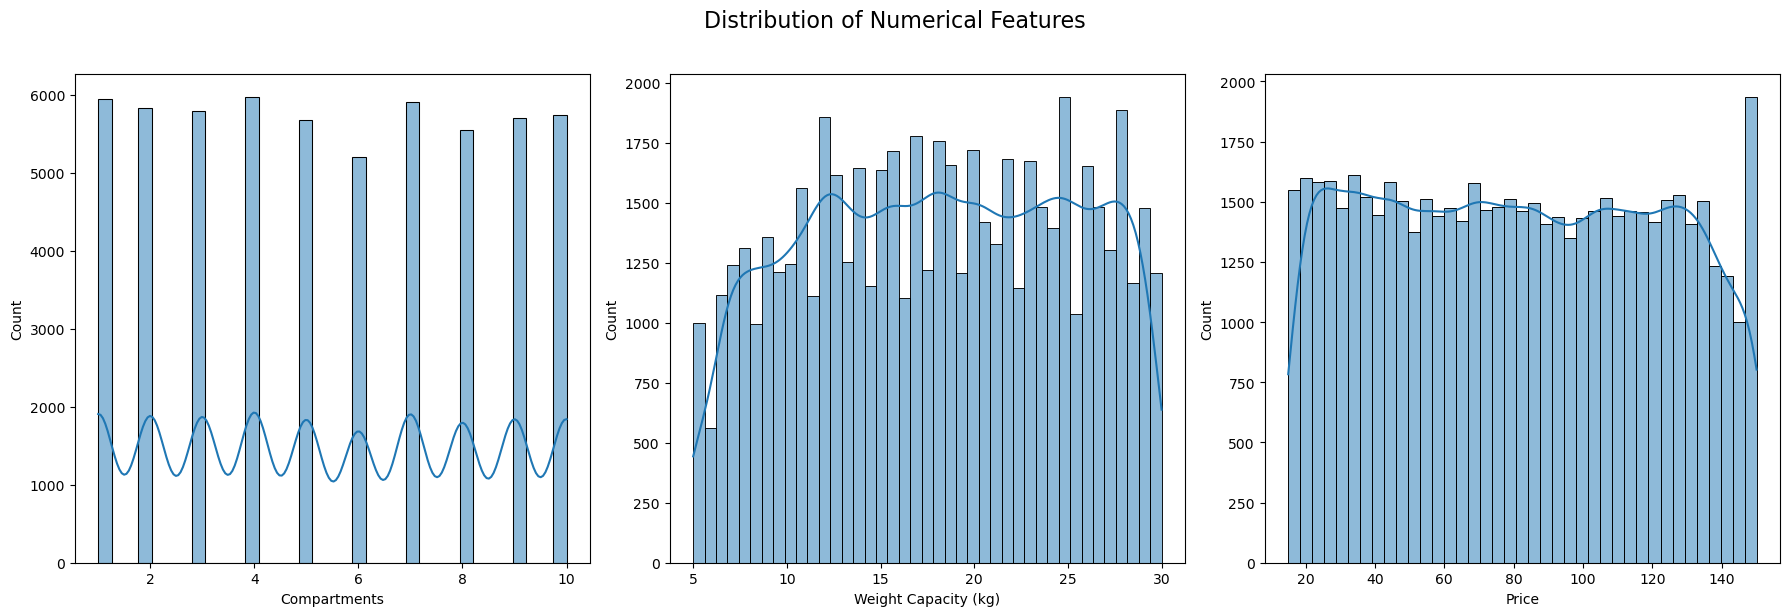

In [4]:
plot_distribution(nike, num_columns, 'num')

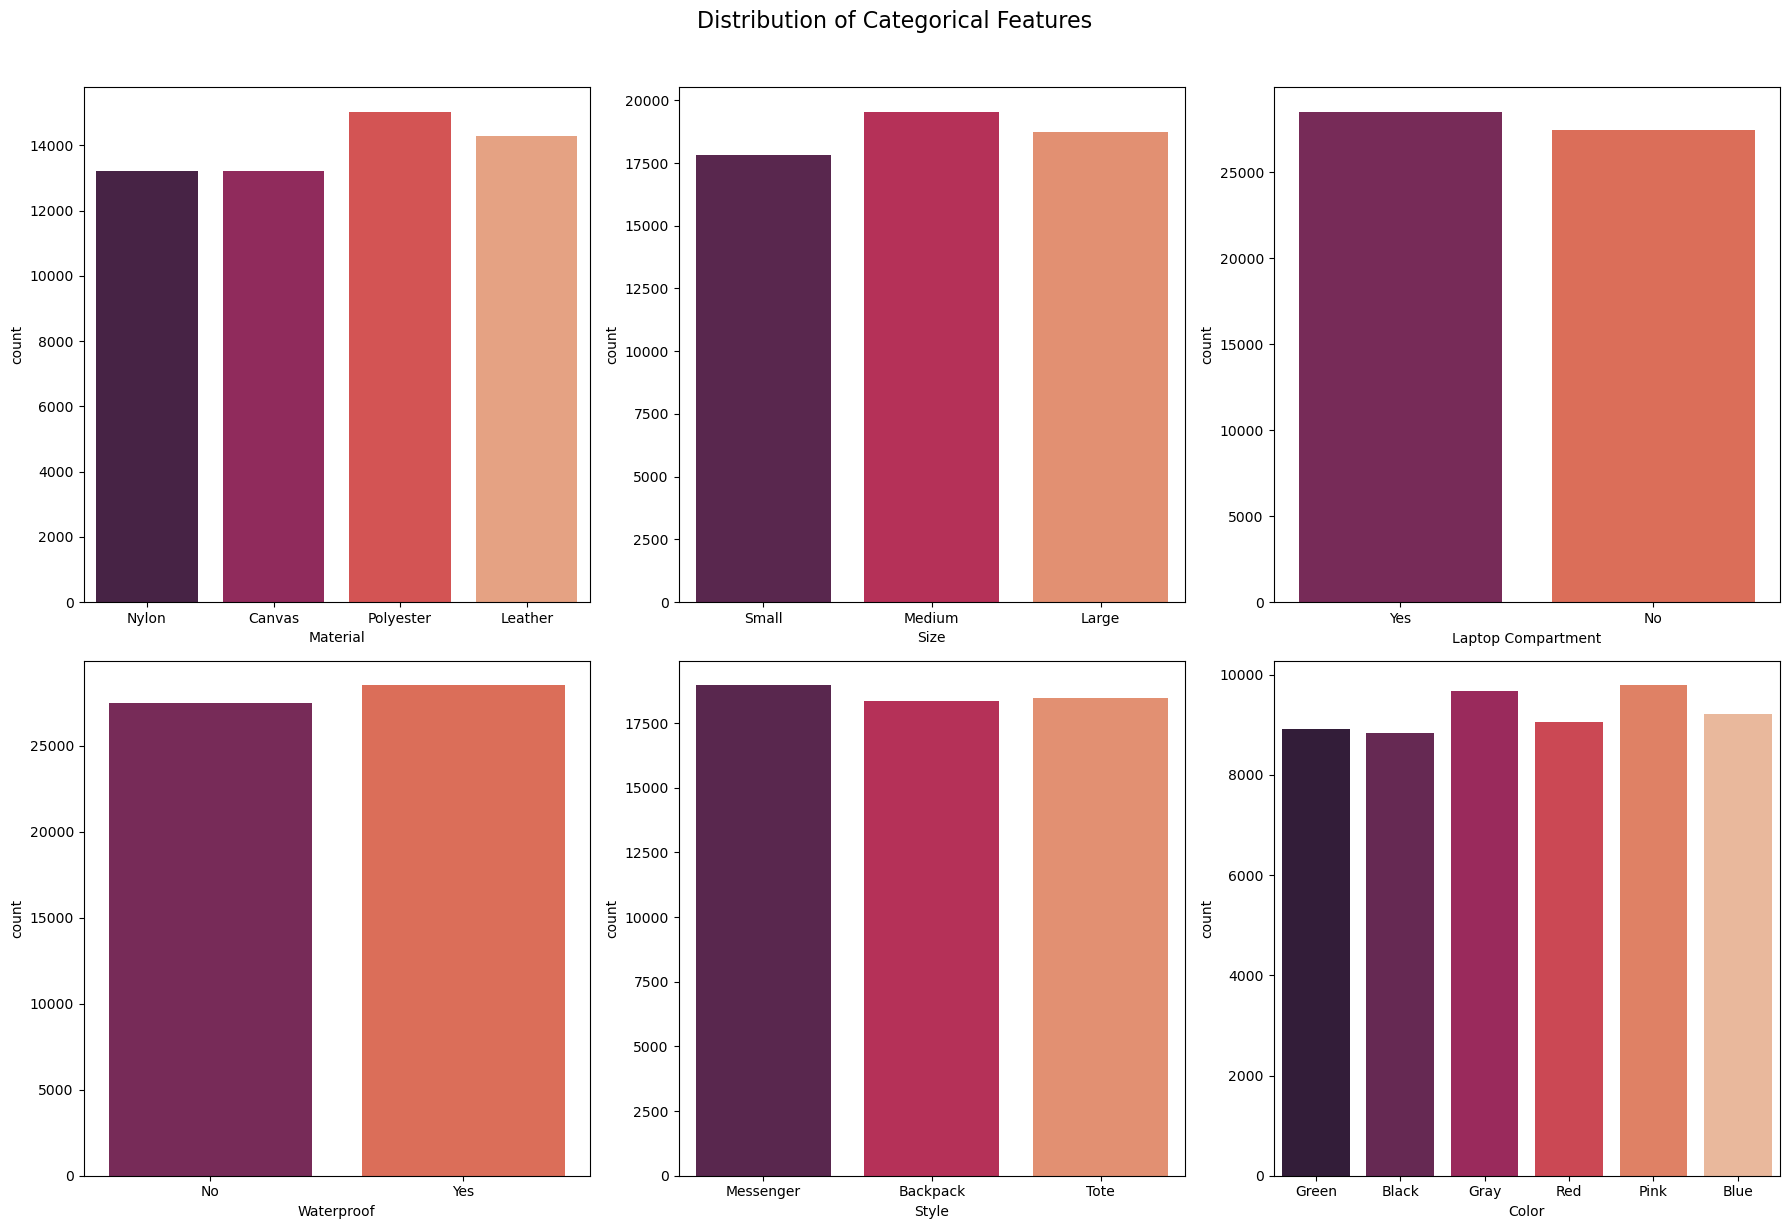

In [10]:
plot_distribution(nike, ['Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color'], 'cat')


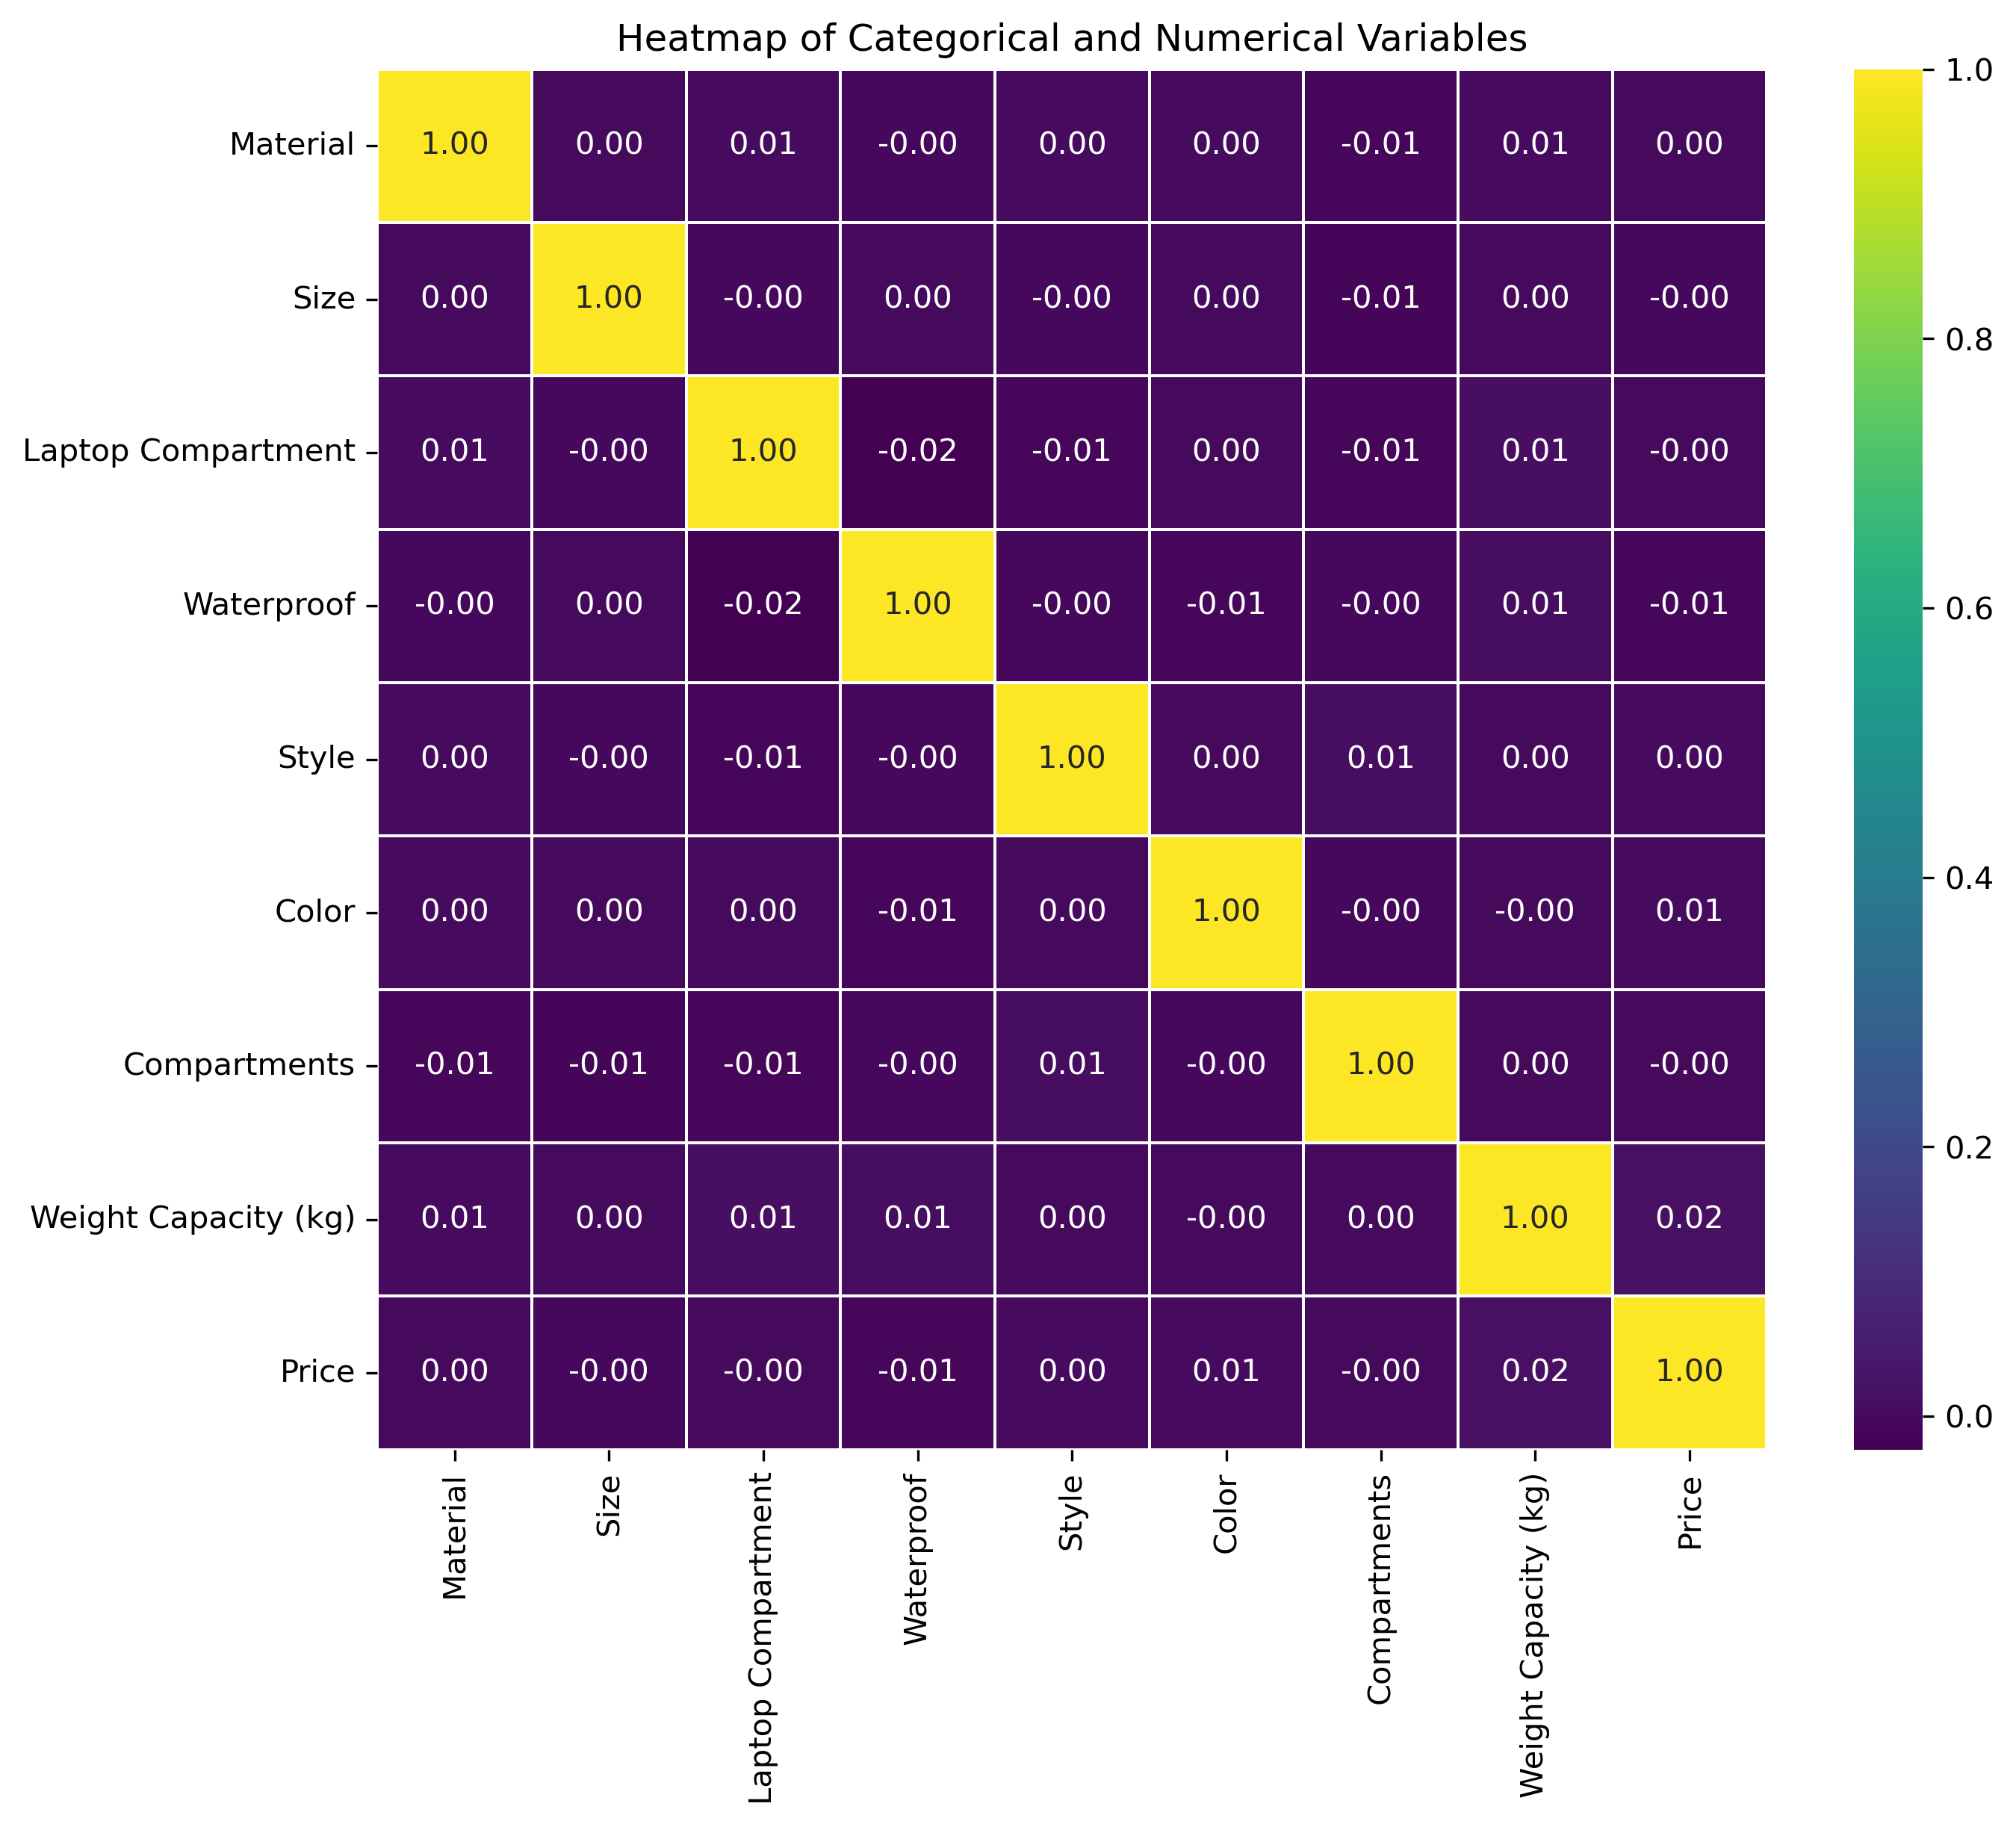

In [12]:
def plot_heat(df, num_columns, cat_columns):
    data_encoded = pd.DataFrame()
    # 分类变量使用标签编码
    label_encoder = LabelEncoder()
    for i in cat_columns:
        data_encoded[i] = label_encoder.fit_transform(df[i])
    # 数值型变量
    scaler = StandardScaler()
    data_encoded[num_columns] = scaler.fit_transform(df[num_columns])
    # 计算相关性矩阵
    heatmap_data = data_encoded.corr(method='spearman')
    # 绘制热图
    plt.figure(figsize=(10, 8), dpi=300)
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
    plt.title('Heatmap of Categorical and Numerical Variables')
    plt.show()
plot_heat(nike, num_columns, ['Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color'])